# Applied Machine Learning with Scikit Learn

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this exercise we will learn how to use scikit-learn to train linear regression, K-NN and logistic regression models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
import seaborn as sns
%matplotlib inline

# Linear Regression: Predicting sales from ads expense

<img src="img/ada_ads.jpg" width="300">

Let's import the dataset:

In [3]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

In [4]:
data.shape

(200, 4)

Visualize the relationship between the features and the response

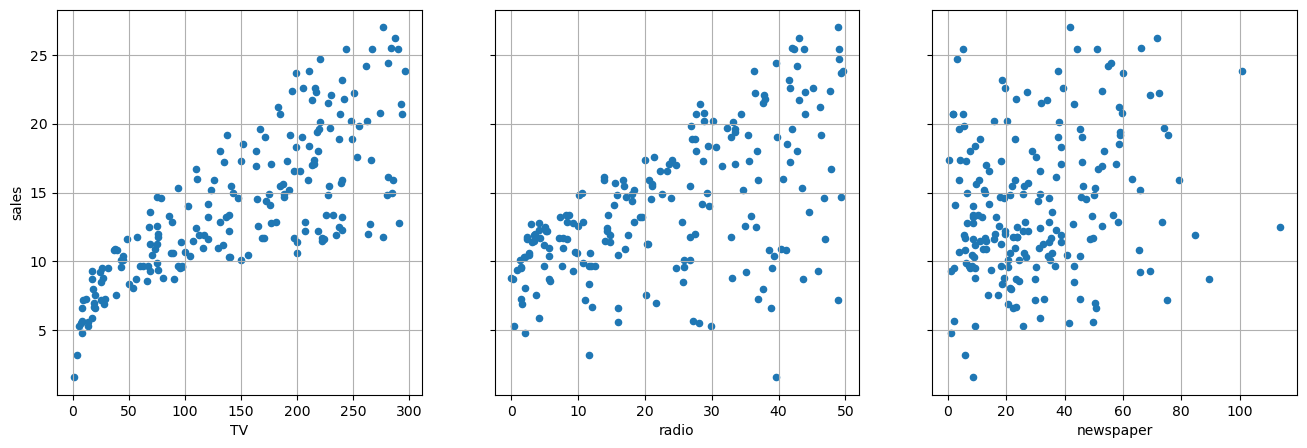

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)
plt.show()

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="img/slope_intercept.png">

## Hands on!
Let's create the feature matrix and the class vector (X and y):

In [6]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


**Scikit-learn** provides an easy way to train the model:

In [7]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

Back to the theory! Let's see what the formula looks like:

In [8]:
# 在 lin_reg.coef_ 和 lin_reg.intercept_ 中的下划线 _ 是 Scikit-learn 中的一种命名约定
# 用于表示这些属性是模型在训练完成后生成的,而非用户在初始化时传入的参数

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.045764645455397615 * TV + 
0.18853001691820448 * radio + 
-0.0010374930424763007 * newspaper + 
2.9388893694594085




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

cross_val_predict 是 Scikit-learn 提供的一个工具，位于 sklearn.model_selection 模块中。

交叉验证预测：对数据进行交叉验证，并返回每个样本的预测结果。它的主要用途是获取对测试集的预测值，而不是训练集上的预测值。cross_val_predict 返回的是模型对每个数据点的预测值（与目标变量 y 大小一致）。

cross_val_predict 的工作流程：
将数据集 X 和 y 分成 cv 折（这里是 cv=5，即 5 折交叉验证）。
对于每一折：
将其中 4 折作为训练集，1 折作为验证集。
使用训练集训练模型 lr，然后在验证集上进行预测。
对所有折的预测结果进行合并，返回一个与 y 大小相同的数组 predicted。

重要：每个数据点的预测值是基于该点未参与训练的模型预测的。

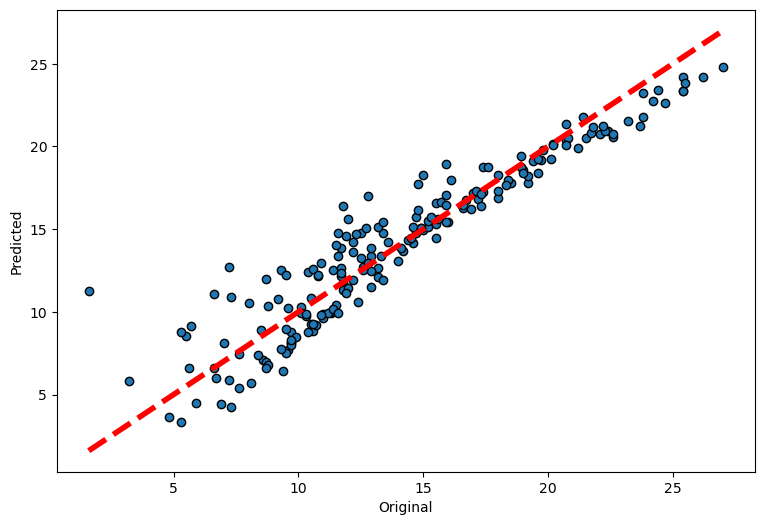

In [9]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

每个点表示一个样本，点的横坐标是该样本的真实值，纵坐标是该样本的预测值。如果模型预测准确，所有点应该接近对角线。

ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4): 

[min(y), max(y)]：横轴和纵轴都取真实值 y 的最小值和最大值，构成参考线的起点和终点。

'r--'：'r' 表示线的颜色是红色，'--' 表示线型是虚线。

lw=4：线宽设为 4。

Cross validation? What is that?
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Print the MSE:

In [10]:
mean_squared_error(y, predicted)

3.072946597100209

MSE 是预测值和真实值之间的平方误差的平均值，用于衡量模型预测的准确性

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

In [11]:
X = X[:5]
y = y[:5]

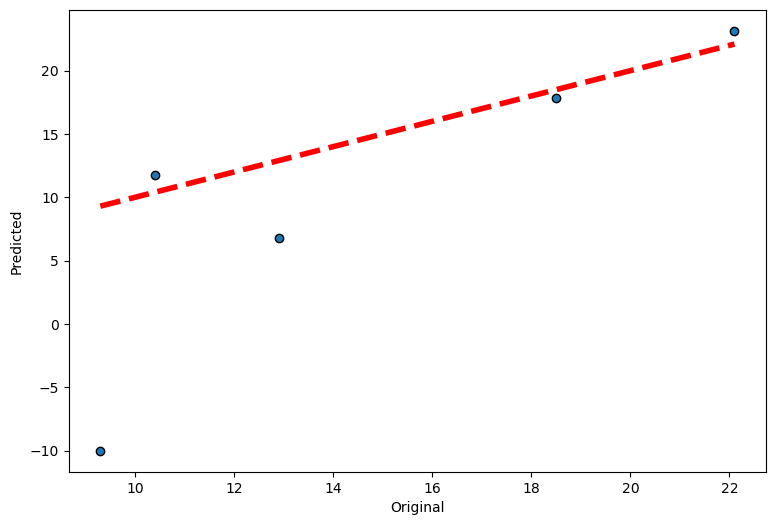

In [13]:
lr = LinearRegression()

predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
mean_squared_error(y, predicted)

82.77419262404126

**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

正则化是一种用于减少过拟合的方法。
它通过在模型的损失函数中添加一个“惩罚项”（penalty term），限制模型的复杂度，使其不能过于依赖训练数据。

岭回归（Ridge Regression） 的交叉验证预测

Ridge 是 Scikit-learn 提供的一个岭回归模型类。它在普通线性回归的基础上引入了正则化项，帮助减少过拟合。

alpha 参数：控制正则化的强度.较大的 alpha 会对回归系数施加更大的惩罚，使模型更加简单，从而减少过拟合。如果 alpha=0，岭回归退化为普通线性回归。

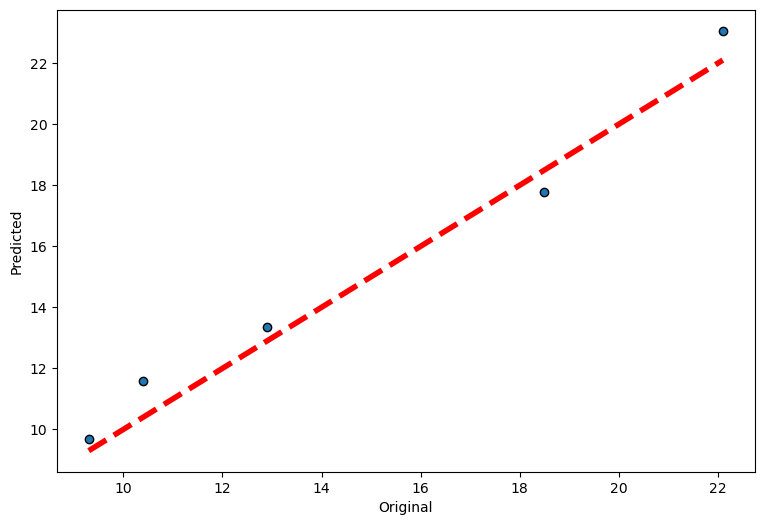

In [15]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [16]:
mean_squared_error(y, predicted_r)

0.6442462580572379

-------
# Predicting Titanic survival with Logistic Regression

Let's use the data obtained by the _Encyclopedia Titanica_ to predict if a passenger survived the Titanic disaster.

<img src="img/titanic.jpg" width="600">

Let's import the dataset:

In [17]:
titanic = pd.read_excel('data/titanic.xls')
titanic.head(5)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


What are the **features**?
- name: Name of the passenger
- sex: Male or Female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Ticket price
- cabin: Cabin number
- embarked: Port of Embarkation

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [18]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(titanic)))

Survived 500, Dead 809
Survived 38.20%


Specify the columns to use as features:

In [19]:
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

For the sake of this execise, we can assume the other features (name, cabin number, embarked) are not predictive.

### Let's prepare the feature vector for the training

The dataset contains one categorical variable: sex (male|female)

We need to convert it to a numerical variable. Pandas offers the method *get_dummies* that takes care of this:

模型（如线性回归或树模型）通常无法直接处理分类变量，因此需要将分类变量转换为数值形式。

pd.get_dummies() 是 pandas 提供的一种方法，用于将分类变量转换为独热编码（One-Hot Encoding）形式。

独热编码的原理：将每个分类变量的每个可能取值转换为一个新的列。如果样本的某个分类变量等于该列对应的取值，则该列的值为 True，否则为 False。

In [20]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()

,age,sibsp,parch,fare,sex_female,sex_male
0,29.0000,0,0,211.3375,True,False
1,0.9167,1,2,151.5500,False,True
2,2.0000,1,2,151.5500,True,False
3,30.0000,1,2,151.5500,False,True
4,25.0000,1,2,151.5500,True,False


The categorical feature _sex_ is converted in 2 boolean features.

Titanic sank in 1912: it was a lot of time ago! Some data may be missing. Let's check if there are undefined values.

In [21]:
len(X[X.isna().any(axis=1)])

264

X.isna(): 检查 X 中的每个元素是否为缺失值（NaN）。返回一个与 X 形状相同的布尔型 DataFrame，其中：如果某个元素是缺失值，则对应位置为 True。如果不是缺失值，则为 False。

X.isna().any(axis=1): any(axis=1) 在每一行检查是否有至少一个 True（即是否有缺失值）。返回一个布尔型 Series，其中：如果某一行有至少一个缺失值，则对应行的值为 True。如果某一行没有缺失值，则为 False。参数 axis=1：表示在行的方向上操作（横向检查每行的所有列）。

X[X.isna().any(axis=1)]: 使用布尔索引，筛选出 X 中所有包含缺失值的行。如果某一行存在至少一个缺失值，则该行会被保留。

len(X[X.isna().any(axis=1)]): 对包含缺失值的行的数量进行统计，返回这些行的总数。

Let's try to fix the data with a basic imputation method: replacing the missing values with the mean.

More info: https://en.wikipedia.org/wiki/Imputation_(statistics)

In [22]:
X = X.fillna(X.mean())

len(X[X.isna().any(axis=1)])

0

X.mean(): 计算每一列的均值（忽略 NaN）。

fillna()：用来填充 DataFrame 中的缺失值。对于每一列，将其均值填充到所有缺失值的位置。

因为对于Titanic的数据，我们的X是对NaN选择用均值填补，所以行数不变，和y一样

The label used for the traning:

In [23]:
y = titanic['survived']

Let's train the model ...

solver='lbfgs':指定优化算法为 lbfgs（Limited-memory Broyden-Fletcher-Goldfarb-Shanno）。lbfgs 是一种拟牛顿法（Quasi-Newton Method），适用于中小型数据集，具有较快的收敛速度。适用于逻辑回归的默认选择，尤其是多分类问题。

其他常用参数（可选）：
penalty：正则化方式（默认 'l2'，表示 L2 正则化）。

C：正则化强度的倒数（默认 1.0，值越小正则化越强）。

max_iter：最大迭代次数。

multi_class：多分类策略（如 ovr 或 multinomial）。

In [24]:
logistic = LogisticRegression(solver='lbfgs')

... and evaluate the precison/recall with a cross validation (10 splits).

这段代码的作用是使用交叉验证来评估逻辑回归模型的 Precision（精确率） 和 Recall（召回率），并以均值和 95% 置信区间的形式输出结果。

Precision (精确率)：表示在模型预测为正类的所有样本中，真正类的比例。精确率关注的是减少误报（False Positives），即预测为正类但实际上是负类的样本。

Precision=True Positives (TP)/(True Positives (TP)+False Positives (FP))
 
Recall (召回率)：表示在实际为正类的所有样本中，模型能够正确预测的比例。召回率关注的是减少漏报（False Negatives），即实际为正类但被预测为负类的样本。

Recall=True Positives (TP)/(True Positives (TP)+False Negatives (FN))

两者的权衡：精确率和召回率通常呈现一种此消彼长的关系：提高精确率可能会降低召回率（如模型更谨慎地预测正类）。提高召回率可能会降低精确率（如模型更积极地预测正类）。

In [25]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.72 (+/- 0.13)
Recall: 0.68 (+/- 0.16)


插入变量部分 % 后的 (precision.mean(), precision.std() * 2)：用括号包裹的元组表示多个要插入的变量值。顺序与占位符一一对应：第一个 %0.2f 对应 precision.mean()。第二个 %0.2f 对应 precision.std() * 2。

Logistic regression uses a threshold on the probability to decide at which class to assign a prediction. In some cases, we are interested to understand how the model behaves at different levels of this threshold.

Let's give a look at the ROC curve!
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

predict_proba 是逻辑回归模型的方法，用于预测每个样本属于每个类别的概率。输出为一个二维数组 y_pred，每行对应一个样本：第一列（y_pred[:, 0]）：样本属于负类（0）的概率。第二列（y_pred[:, 1]）：样本属于正类（1）的概率。我们通常取第二列（正类的概率）用于计算 ROC 曲线。

fpr, tpr, _ = roc_curve(y, y_pred[:, 1])

输入：

y：真实标签（0 或 1）。

y_pred[:, 1]：预测的正类概率（来自 predict_proba 的第二列）。

输出：

fpr：不同阈值下的假阳性率。

tpr：不同阈值下的真阳性率。

_：对应的阈值（这里不需要用到，因此用 _ 占位）。

AUC 是衡量分类模型性能的指标，取值范围为 [0, 1]：

AUC = 1：完美分类，模型性能最佳。

AUC = 0.5：随机分类，模型无预测能力。

AUC < 0.5：性能比随机分类还差，可能分类方向反了。

In [26]:
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr) # 一个浮点数，表示 ROC 曲线下的面积。

... and plot the result:

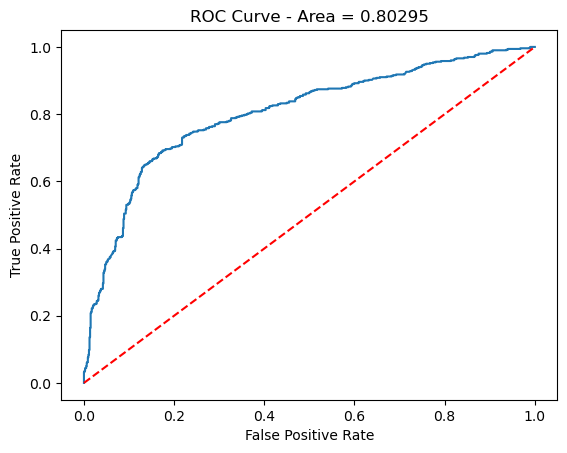

In [29]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score))
plt.show()

### Explore the model output

Let's train on the full dataset:

In [30]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)

LogisticRegression()

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you have survived?

Remember the features:

In [31]:
X.columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male'], dtype='object')

Would a man, 25 years old without relative onboard, and with a fare of 100 survive?

In [34]:
test=[25,0,0,100,0,1]
if logistic.predict([test])[0] == 1:
    print("YES")
else:
    print("NO")

NO


What is the probability distribution behind this prediction?

In [35]:
logistic.predict_proba([test])

array([[0.5528599, 0.4471401]])

What about a woman, 35 years old, alone onboard and with the same fare?

In [36]:
test=[35,0,0,100,1,0]
if logistic.predict([test])[0] == 1:
    print("YES")
else:
    print("NO")

logistic.predict_proba([test])

YES


array([[0.11464109, 0.88535891]])

---------

# Overview on K-NN

Let's create some complex shapes to observe how K-NN behaves.

make_moons：生成一个二维的“月亮形”数据集，用于分类任务。数据集包含两个类别（0 和 1），每一类数据呈现半月形状。

参数解释：

n_samples=500：生成 500 个样本点。

noise=0.2：加入 0.2 的随机噪声，使数据更加不规则。

random_state=0：随机种子，用于保证每次运行生成相同的数据。

返回值：

X_moons：二维特征矩阵（形状为 (500, 2)）。每一行表示一个样本的二维坐标（x1, x2）。

y_moons：目标变量（形状为 (500,)）。包含 500 个类别标签（0 或 1）。

make_gaussian_quantiles：生成一个二维的“环形”数据集（类似同心圆的结构），用于分类任务。数据集包含两个类别（0 和 1），每类数据点呈高斯分布。

参数解释：

n_samples=100：生成 100 个样本点。

random_state=0：随机种子，用于保证每次运行生成相同的数据。

返回值：

X_circles：二维特征矩阵（形状为 (100, 2)）。每一行表示一个样本的二维坐标（x1, x2）。

y_circles：目标变量（形状为 (100,)）。包含 100 个类别标签（0 或 1）。

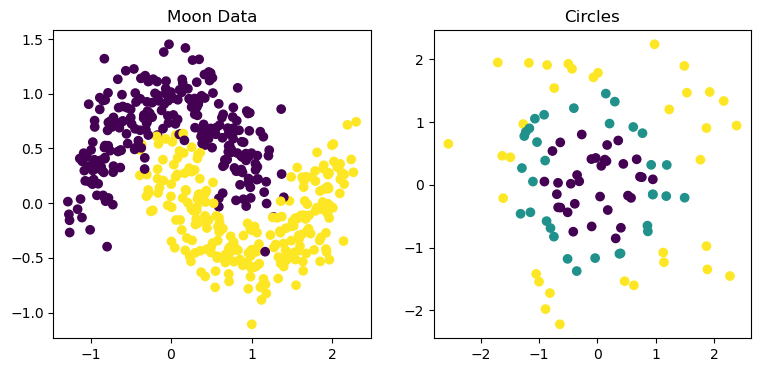

In [37]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons) 
# X_moons[:, 0]：取出所有样本的第一个特征（横坐标）
# X_moons[:, 1]：取出所有样本的第二个特征（纵坐标）
# c=y_moons：根据类别标签（y_moons）为散点着色。
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

plt.show()

Plotting function to predict the class of different areas of the features space.

In [38]:
# Plotting helper 
# Source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02                     # 定义网格的步长（h=0.02），即网格中点与点之间的间隔。步长越小，生成的网格越精细，决策边界越平滑，但计算量会增加。
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue']) # 为网格区域（背景）定义的颜色映射，表示不同类别的区域。每个类别对应一个颜色。
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue']) # 为散点图（数据点）定义的颜色映射，表示数据点的实际类别。

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20) # edgecolor='k'：设置散点边框为黑色。
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

这段代码定义了一个函数 plot_prediction，用于可视化分类模型的预测结果。它在二维平面上显示了分类模型的决策边界，同时将训练数据点用散点图标记出来。这种图通常用于分析和展示分类模型（如 KNN、SVM 或逻辑回归）对数据的分类效果。

np.meshgrid：生成一个二维网格，xx 是 X 方向的网格点，yy 是 Y 方向的网格点。np.arange(x_min, x_max, h)：在 X 方向上以步长 h 生成点。np.arange(y_min, y_max, h)：在 Y 方向上以步长 h 生成点。生成的 xx 和 yy 是形状为 (n_rows, n_cols) 的二维数组，分别表示网格点的横坐标和纵坐标。

xx.ravel() 和 yy.ravel()：将二维数组 xx 和 yy 展平为一维数组，表示网格中的所有点。xx.ravel() 和 yy.ravel() 的长度为网格点的总数。

np.c_[...]：将 xx.ravel() 和 yy.ravel() 拼接为形状为 (n_points, 2) 的二维数组。每行是一个网格点的坐标。

Create the models for both dataset with K=1 and K=15.

KNeighborsClassifier(n_neighbors):是 Scikit-learn 提供的 KNN 分类器类。参数 n_neighbors 决定了分类器中使用的最近邻样本数量K

In [39]:
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

KNeighborsClassifier(n_neighbors=15)

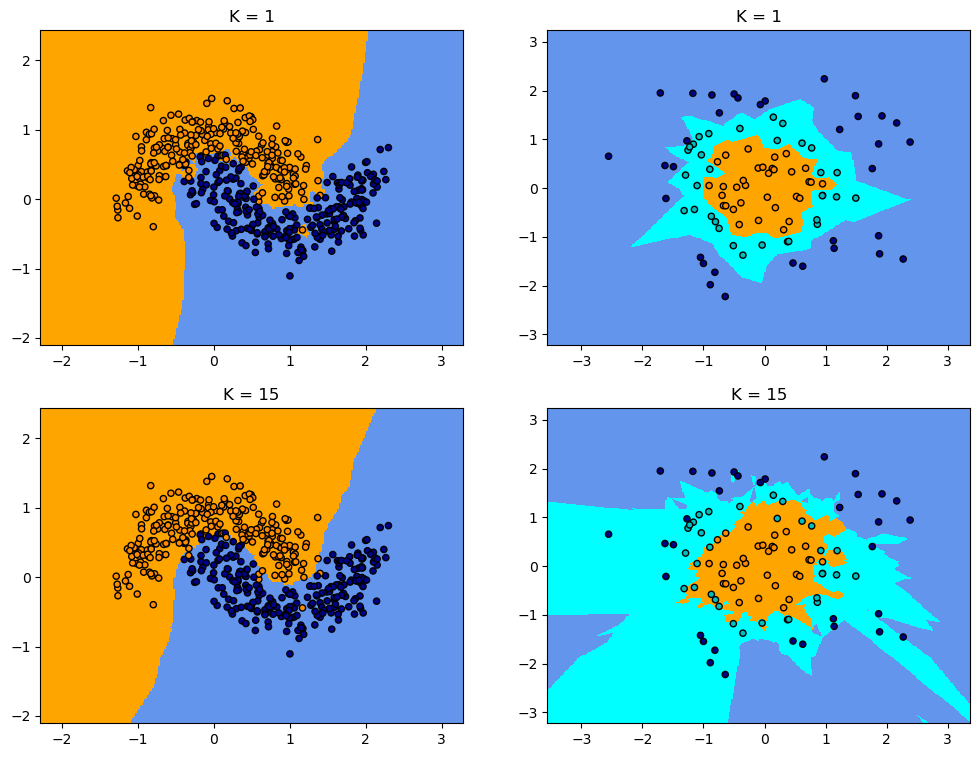

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)

plt.show()

-------
# Exercises


### Question 1: Which of the following classification models fulfills all three characteristics: i) it is the quickest to train, ii) it is able to handle complex decision boundaries, and iii) it doesn’t require additional retraining to make predictions that take into account freshly obtained data points?

 - a) logistic regression
 - b) k nearest neighbors
 - c) random forest
 - d) deep neural network
 
Answer:

a) 逻辑回归模型是线性模型，不容易处理复杂的决策边界；

b) 正确；

c) 随机森林由多棵决策树组成，训练过程需要生成多棵树并结合它们的结果，计算复杂度较高，尤其是当数据集较大时，因此不满足quickest；并且是一种参数化模型，新增数据需要重新训练整个模型。

d) 深度神经网络 (Deep Neural Network)需要大量计算资源来进行反向传播，训练时间长，尤其在大型数据集上。并且是参数化模型，如果有新数据加入，通常需要重新训练整个网络或进行微调（fine-tuning）。

### Question 2: A logistic regression model...

 - a) is trained by minimizing the least-squares error
 - b) makes predictions in the range [0,1]
 - c) makes predictions in the range [0,+inf] 
 - d) can perfectly separate white from gray dots as a linear function of x = [x1, x2]  when x1, x2 ∈ {0, 1} and y = x1 XOR x2, as in the following picture: 

<img src="img/q4.png" width="250">

Answer: 

a) 逻辑回归的目标是最大化 对数似然函数（log-likelihood function），而不是最小化最小二乘误差。最小化最小二乘误差通常用于线性回归。

b) 正确；

c) 错误；

d) 逻辑回归无法用线性函数处理 XOR 问题。逻辑回归是线性模型：它的决策边界是线性分割（例如一条直线）。XOR 问题需要一个非线性决策边界才能分开，比如决策树或神经网络可以解决，但逻辑回归不能。

### Question 3: Train a Random Forest model to predict the if a passenger of Titanic survived.

- Use random forest classifier with max tree depth of 3 (and random_state=0)
- Train the classifier by variating the number of trees from 1 to 20 (N)
- For each step estimate precision/recall with cross validation (10-folds)
- Plot 2 curves for different values of N

In [43]:
titanic = pd.read_excel('data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

In [45]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [n for n in range(1,21)]
precision_scores = []
recall_scores = []

for nt in number_trees:
    clf = RandomForestClassifier(max_depth=3, n_estimators=nt, random_state=0)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=10, scoring='precision')
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=10, scoring='recall')
    recall_scores.append(recall.mean())

cross_val_predict 只返回模型的预测结果，不涉及任何性能评估或交叉验证。

cross_val_score 不只是对整个数据进行预测，它还切分数据、训练模型，并在验证集上评估性能，是一个自动化的评估过程。

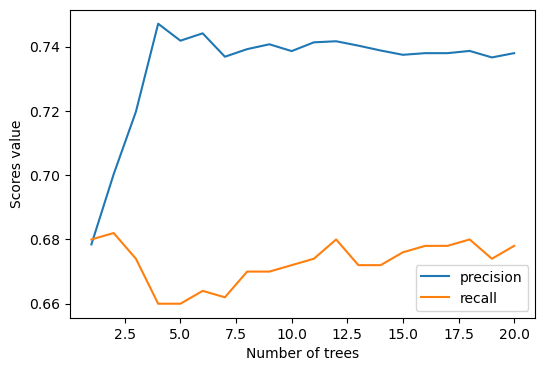

In [47]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label='precision')
ax.plot(number_trees, recall_scores, label='recall')

plt.xlabel("Number of trees")
plt.ylabel("Scores value")

plt.legend()
plt.show()